This notebook illustrates using clustering and our descriptors compounds.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode()


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer



import warnings
warnings.filterwarnings("ignore")

In [64]:
# import data
data = pd.read_csv("../../../data/processed/drug_bank_clean.csv")

In [65]:
data.head(2)

Name                                             SMILES   ALogP  \
0  Bivalirudin  CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@... -5.0931   
1   Leuprolide  CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...  0.4325   

      ALogp2       AMR        apol  nAcid  naAromAtom  nAromBond  nAtom  ...  \
0  25.939668  534.3813  317.363434      6          18         18    293  ...   
1   0.187056  317.0896  187.074612      0          20         21    171  ...   

            MW      WTPT-1    WTPT-2     WTPT-3     WTPT-4     WTPT-5  \
0  2180.289181  306.516036  1.977523  153.54308  82.176355  71.366725   
1  1209.400552  174.200943  2.002310   78.03037  30.548034  47.482336   

      WPATH   WPOL  XLogP  Zagreb  
0  286334.0  230.0 -8.623   752.0  
1   46759.0  130.0  1.134   436.0  

[2 rows x 224 columns]

In [66]:
# getting all descriptors except compound name
without_compound = data.drop(['Name','SMILES'], axis=1)
without_compound.head(2)

ALogP     ALogp2       AMR        apol  nAcid  naAromAtom  nAromBond  \
0 -5.0931  25.939668  534.3813  317.363434      6          18         18   
1  0.4325   0.187056  317.0896  187.074612      0          20         21   

   nAtom     ATSc1     ATSc2  ...           MW      WTPT-1    WTPT-2  \
0    293  5.125258 -2.388694  ...  2180.289181  306.516036  1.977523   
1    171  2.269431 -1.093604  ...  1209.400552  174.200943  2.002310   

      WTPT-3     WTPT-4     WTPT-5     WPATH   WPOL  XLogP  Zagreb  
0  153.54308  82.176355  71.366725  286334.0  230.0 -8.623   752.0  
1   78.03037  30.548034  47.482336   46759.0  130.0  1.134   436.0  

[2 rows x 222 columns]

In [67]:
# scaling our data by using standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(without_compound)

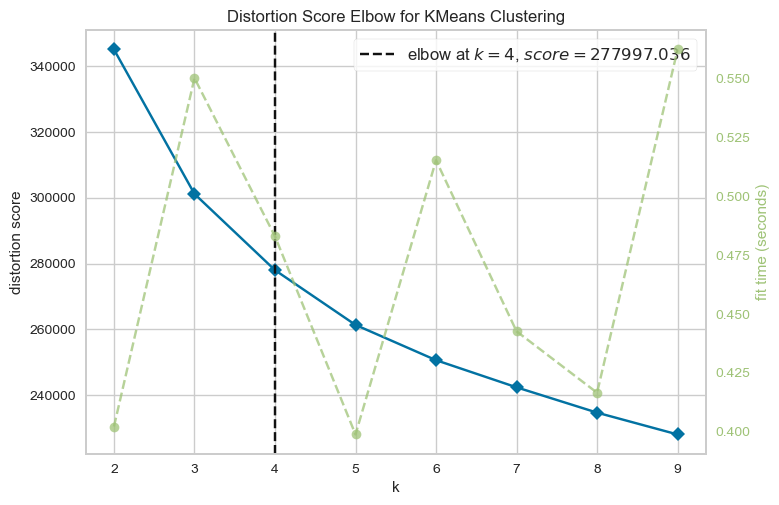

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [68]:
# Instantiate the KMeans model
kmeans_model = KMeans()

# Instantiate the KElbowVisualizer
elbow_visualizer = KElbowVisualizer(kmeans_model, k=(2, 10))

# Fit the visualizer to the data
elbow_visualizer.fit(X_scaled)

# Visualize the elbow plot
elbow_visualizer.show()

Cluster 2 Sillhoute Score 0.6052890589244336
Cluster 3 Sillhoute Score 0.4619443890753173
Cluster 4 Sillhoute Score 0.3211472002824426
Cluster 5 Sillhoute Score 0.34036123684661096
Cluster 6 Sillhoute Score 0.25251194393210996
Cluster 7 Sillhoute Score 0.2105143117832821
Cluster 8 Sillhoute Score 0.19188510767689246
Cluster 9 Sillhoute Score 0.10184043368003524
Cluster 10 Sillhoute Score 0.185408223183622
Cluster 11 Sillhoute Score 0.11256354598019816
Cluster 12 Sillhoute Score 0.06667062804390197
Cluster 13 Sillhoute Score 0.09103955759086348
Cluster 14 Sillhoute Score 0.045862582178898756
Cluster 15 Sillhoute Score 0.01638027300750808
Cluster 16 Sillhoute Score 0.06043540769140875
Cluster 17 Sillhoute Score 0.038557908582146444
Cluster 18 Sillhoute Score -0.025722415116019217
Cluster 19 Sillhoute Score -0.026466102547843425


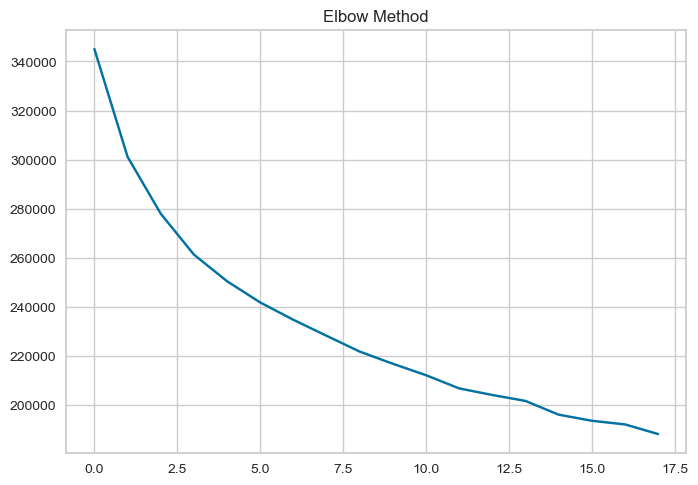

In [76]:
# elbow method
n_clusters = 20
cost = []
for i in range(2, n_clusters):
    kmean= KMeans(i, n_init=10, max_iter=1000)
    kmean.fit(X_scaled)
    labels = kmean.labels_
    
    cost.append(kmean.inertia_)
    print("Cluster {} Sillhoute Score {}".format(i, silhouette_score(without_compound, labels)))  

plt.title("Elbow Method")
plt.plot(cost, 'bx-');

In [69]:
kmean = KMeans(4, n_init=10, max_iter=1000)
kmean.fit(X_scaled)
labels = kmean.labels_

In [70]:
# adding clusters to our data
clusters = pd.concat([without_compound, pd.DataFrame({'cluster': labels})], axis=1)
clusters.head()

ALogP     ALogp2       AMR        apol  nAcid  naAromAtom  nAromBond  \
0 -5.0931  25.939668  534.3813  317.363434      6          18         18   
1  0.4325   0.187056  317.0896  187.074612      0          20         21   
2 -1.8743   3.513000  325.6625  190.878612      0          20         21   
3  9.1843  84.351366  493.8733  292.709055      0          36         40   
4 -2.8933   8.371185  269.4076  154.458752      0          12         12   

   nAtom     ATSc1     ATSc2  ...      WTPT-1    WTPT-2      WTPT-3  \
0    293  5.125258 -2.388694  ...  306.516036  1.977523  153.543080   
1    171  2.269431 -1.093604  ...  174.200943  2.002310   78.030370   
2    175  2.635543 -1.251529  ...  181.809125  1.997902   88.729976   
3    266  3.021552 -1.418733  ...  261.668224  1.997467   98.311965   
4    138  2.148910 -0.961833  ...  147.352827  1.991254   75.875569   

      WTPT-4     WTPT-5     WPATH   WPOL  XLogP  Zagreb  cluster  
0  82.176355  71.366725  286334.0  230.0 -8.623   752.0        2  
1  30.548034  47.482336   46759.0  130.0  1.134   436.0        2  
2  35.878826  52.851150   52357.0  134.0 -2.012   458.0        2  
3  40.550947  57.761019  148212.0  208.0  8.583   660.0        2  
4  30.211599  39.611320   28498.0  110.0 -1.437   360.0        2  

[5 rows x 223 columns]

In [73]:
silhouette_score(without_compound, labels)

0.3222807232239666

### All features

In [54]:
# using pca with 2 components to visualize our scaled data with clusters
components = 2

# initilizing and fitting the pca
pca = PCA(n_components=components)
X_pca = pca.fit_transform(X_scaled)

# making dataframe for our pca components
pca_df = pd.DataFrame(X_pca, columns=['PCA1','PCA2'])

# adding cluster assignment
pca_df['cluster'] = pd.Categorical(kmean.labels_)

# adding compound name to this dataframe
# pca_df['compound'] = data['Name']

# get the index of the most important feature on EACH component i.e. largest absolute value
most_important = [np.abs(pca.components_[i]).argmax() for i in range(components)]

# columns/ features of our data
initial_feature_names = without_compound.columns

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(components)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i + 1): most_important_names[i] for i in range(components)}

# explained variance
print("Explained variance ratio", pca.explained_variance_ratio_)
print("\nnSum of Explained variance ratio", pca.explained_variance_ratio_.sum())
print("\nColumns chosen by PCA", dic)


pca_df


fig = px.scatter(pca_df, x='PCA1', y='PCA2', color="cluster",  title="Compounds Clustering - All Features", width=800)

# saving the figure in html file
# fig.write_html("cluster4.html")

fig.show()

Explained variance ratio [0.34087863 0.09107553]

nSum of Explained variance ratio 0.43195416148056454

Columns chosen by PCA {'PC1': 'Zagreb', 'PC2': 'khs.ssssC'}


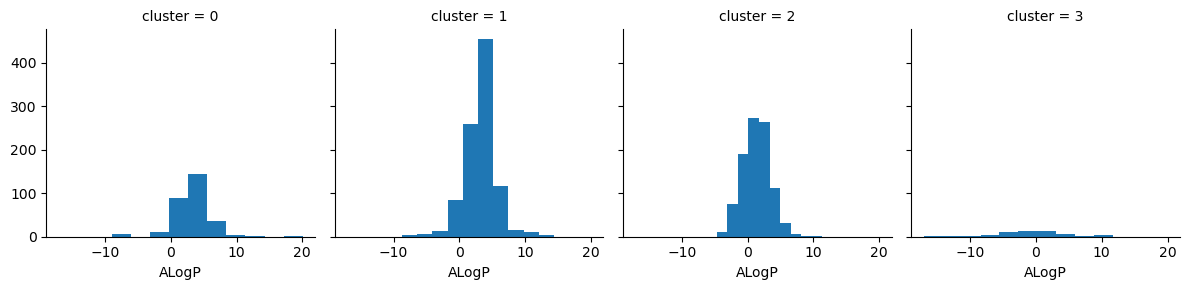

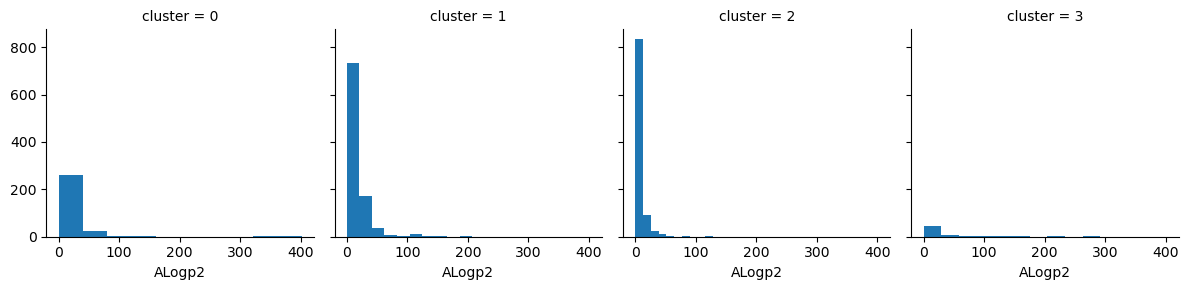

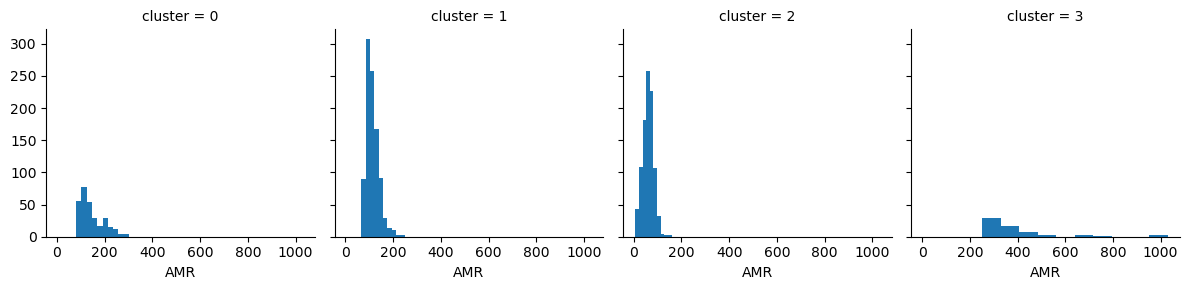

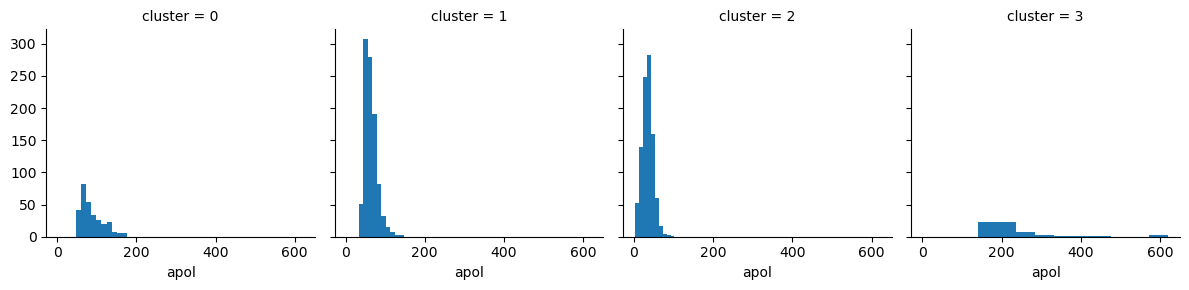

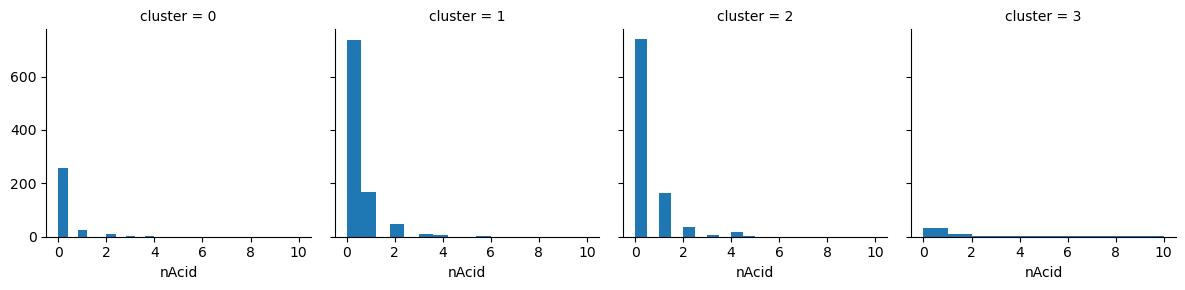

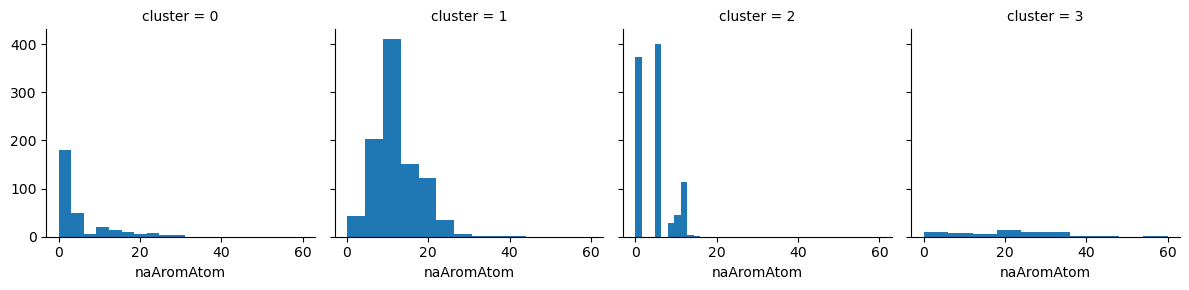

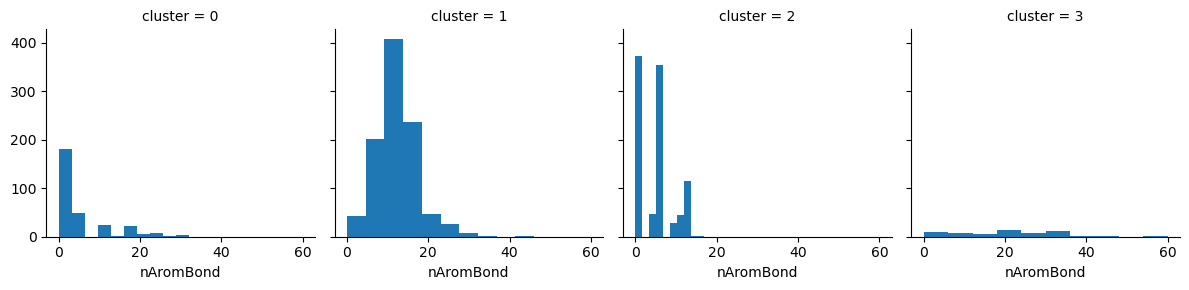

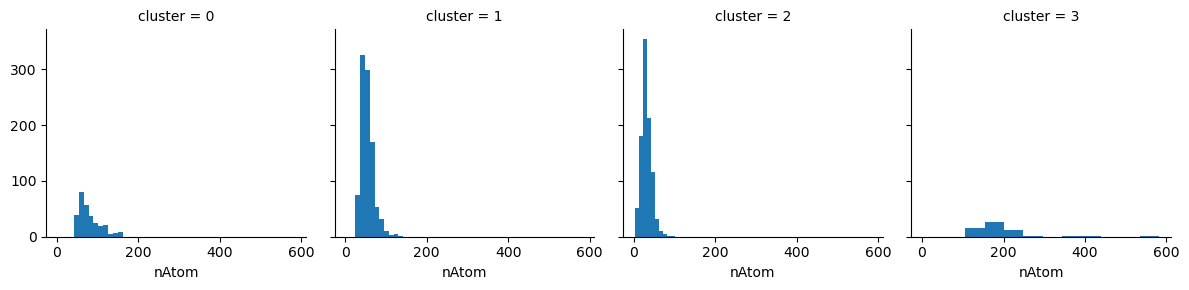

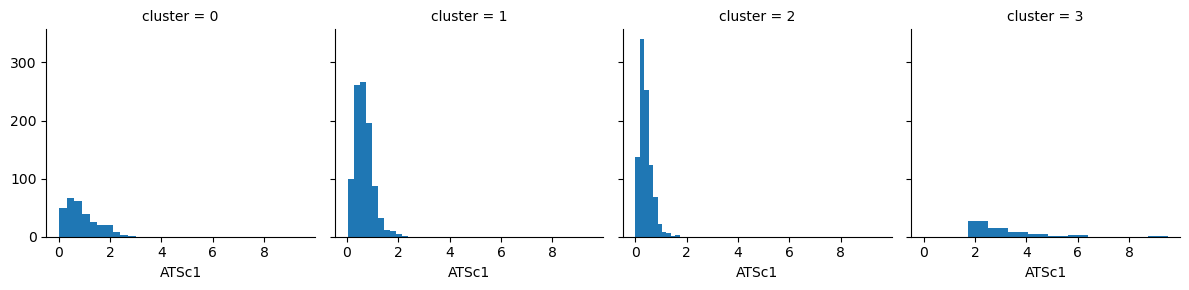

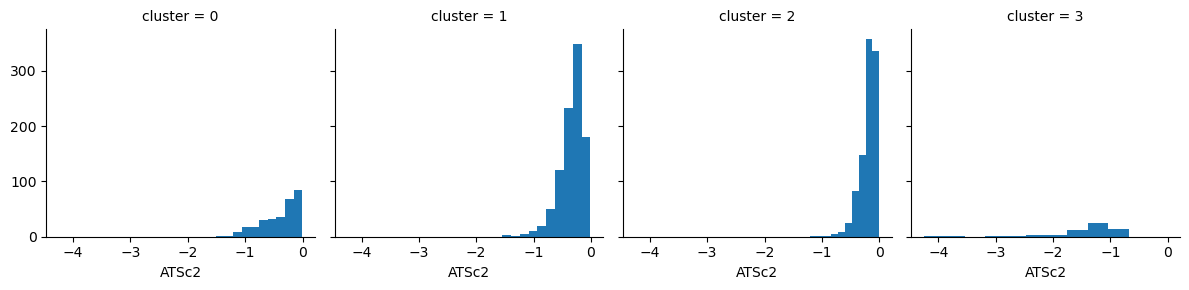

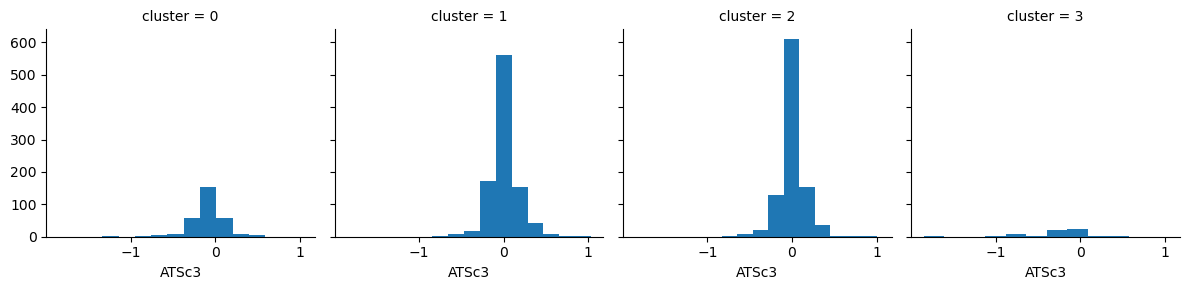

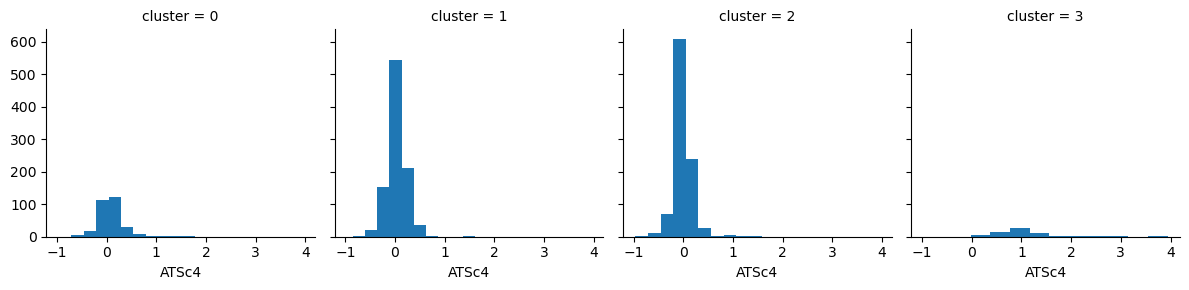

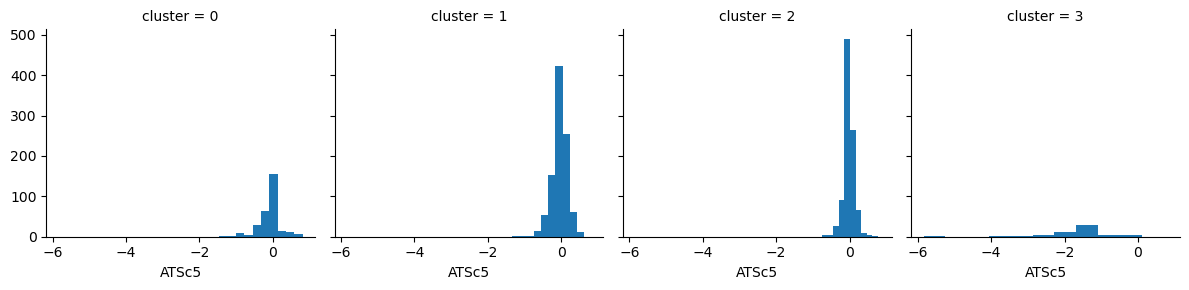

Error in callback <function flush_figures at 0x000002179EC8BD90> (for post_execute):


KeyboardInterrupt: 

In [21]:
for c in clusters:
    grid = sns.FacetGrid(clusters, col="cluster")
    grid.map(plt.hist, c)

### 99% of Components

In [55]:
# using pca with 2 components to visualize our scaled data with clusters
components = 0.99

# initilizing and fitting the pca
pca = PCA(n_components=components)
X_pca = pca.fit_transform(X_scaled)
pca.n_components_

82

In [56]:
kmean = KMeans(4, n_init=10, max_iter=1000)
kmean.fit(X_pca)
labels = kmean.labels_

In [57]:
silhouette_score(without_compound, labels)

0.3260162289955886

In [58]:
# using pca with 2 components to visualize our scaled data with clusters
components = 2

# initilizing and fitting the pca
pca = PCA(n_components=components)
X_pca = pca.fit_transform(X_pca)

# making dataframe for our pca components
pca_df = pd.DataFrame(X_pca, columns=['PCA1','PCA2'])

# adding cluster assignment
pca_df['cluster'] = pd.Categorical(kmean.labels_)

# adding compound name to this dataframe
# pca_df['compound'] = data['Name']

# get the index of the most important feature on EACH component i.e. largest absolute value
most_important = [np.abs(pca.components_[i]).argmax() for i in range(components)]

# columns/ features of our data
initial_feature_names = without_compound.columns

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(components)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i + 1): most_important_names[i] for i in range(components)}

# explained variance
print("Explained variance ratio", pca.explained_variance_ratio_)
print("\nnSum of Explained variance ratio", pca.explained_variance_ratio_.sum())
print("\nColumns chosen by PCA", dic)


pca_df


fig = px.scatter(pca_df, x='PCA1', y='PCA2', color="cluster", title="Compounds Clustering - 99% Components PCA", width=800)

# saving the figure in html file
# fig.write_html("cluster4.html")

fig.show()

Explained variance ratio [0.34426944 0.09198149]

nSum of Explained variance ratio 0.436250926823815

Columns chosen by PCA {'PC1': 'ALogP', 'PC2': 'ALogp2'}


In [ ]:
# adding clusters to our data
clusters = pd.concat([without_compound, pd.DataFrame({'cluster': labels})], axis=1)
clusters.head(3)

In [ ]:
for c in clusters:
    grid = sns.FacetGrid(clusters, col="cluster")
    grid.map(plt.hist, c)

### 2 Components

In [59]:
# using pca with 2 components to visualize our scaled data with clusters
components = 2

# initilizing and fitting the pca
pca = PCA(n_components=components)
X_pca = pca.fit_transform(X_scaled)
pca.n_components_

2

In [60]:
kmean = KMeans(4, n_init=10, max_iter=1000)
kmean.fit(X_pca)
labels = kmean.labels_

In [61]:
silhouette_score(without_compound, labels)

0.33797134997057604

In [36]:
# using pca with 2 components to visualize our scaled data with clusters
components = 2

# initilizing and fitting the pca
pca = PCA(n_components=components)
X_pca = pca.fit_transform(X_pca)

# making dataframe for our pca components
pca_df = pd.DataFrame(X_pca, columns=['PCA1','PCA2'])

# adding cluster assignment
pca_df['cluster'] = pd.Categorical(kmean.labels_)

# adding compound name to this dataframe
# pca_df['compound'] = data['Name']

# get the index of the most important feature on EACH component i.e. largest absolute value
most_important = [np.abs(pca.components_[i]).argmax() for i in range(components)]

# columns/ features of our data
initial_feature_names = without_compound.columns

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(components)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i + 1): most_important_names[i] for i in range(components)}

# explained variance
print("Explained variance ratio", pca.explained_variance_ratio_)
print("\nnSum of Explained variance ratio", pca.explained_variance_ratio_.sum())
print("\nColumns chosen by PCA", dic)


pca_df


fig = px.scatter(pca_df, x='PCA1', y='PCA2', color="cluster", title="Compounds Clustering - 2 Components PCA", width=800)

# saving the figure in html file
# fig.write_html("cluster4.html")

fig.show()

Explained variance ratio [0.78915463 0.21084537]

nSum of Explained variance ratio 1.0

Columns chosen by PCA {'PC1': 'ALogP', 'PC2': 'ALogp2'}


In [42]:
# adding clusters to our data
clusters = pd.concat([without_compound, pd.DataFrame({'cluster': labels})], axis=1)
clusters.head(3)

ALogP     ALogp2       AMR        apol  nAcid  naAromAtom  nAromBond  \
0 -5.0931  25.939668  534.3813  317.363434      6          18         18   
1  0.4325   0.187056  317.0896  187.074612      0          20         21   
2 -1.8743   3.513000  325.6625  190.878612      0          20         21   

   nAtom     ATSc1     ATSc2  ...      WTPT-1    WTPT-2      WTPT-3  \
0    293  5.125258 -2.388694  ...  306.516036  1.977523  153.543080   
1    171  2.269431 -1.093604  ...  174.200943  2.002310   78.030370   
2    175  2.635543 -1.251529  ...  181.809125  1.997902   88.729976   

      WTPT-4     WTPT-5     WPATH   WPOL  XLogP  Zagreb  cluster  
0  82.176355  71.366725  286334.0  230.0 -8.623   752.0        2  
1  30.548034  47.482336   46759.0  130.0  1.134   436.0        2  
2  35.878826  52.851150   52357.0  134.0 -2.012   458.0        2  

[3 rows x 223 columns]

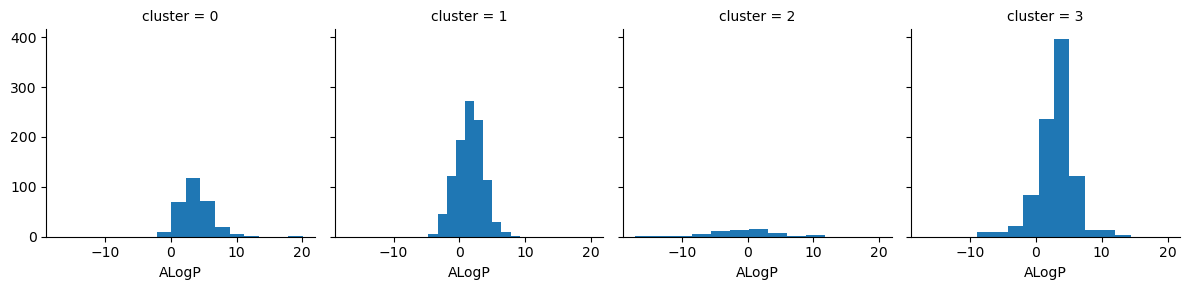

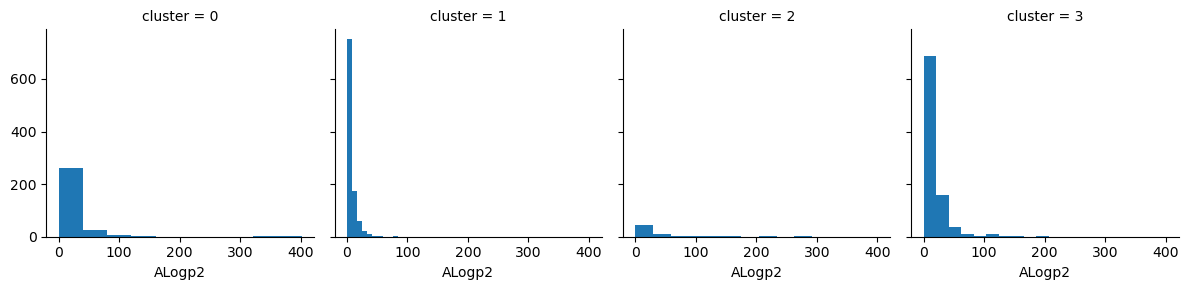

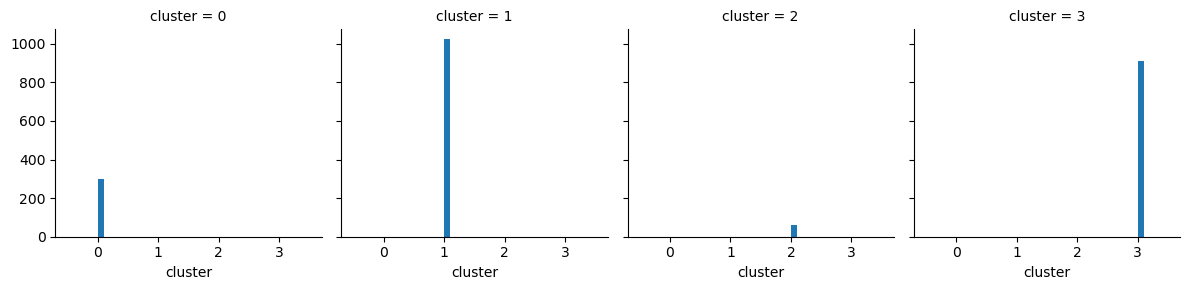

In [40]:
for c in clusters:
    grid = sns.FacetGrid(clusters, col="cluster")
    grid.map(plt.hist, c)

# Interpretation

In [19]:
# for c in clusters:
#     grid = sns.FacetGrid(clusters, col="cluster")
#     grid.map(sns.boxplot, c)